In [407]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [123]:
real_LAI_dataset = pd.read_csv("LAI_Woody_Plants_Database2.csv")
real_LAI_dataset = real_LAI_dataset[['Publication_year','Total_LAI_Original',
                                     'Country','Location', 'Latitude', 'Longitude' ]]
real_LAI_dataset = real_LAI_dataset.drop(0)
real_LAI_dataset['Publication_year'] = real_LAI_dataset['Publication_year'].astype(int)
real_LAI_dataset['Total_LAI_Original'] = real_LAI_dataset['Total_LAI_Original'].astype(float)
real_LAI_dataset['Latitude'] = real_LAI_dataset['Latitude'].astype(float)
real_LAI_dataset['Longitude'] = real_LAI_dataset['Longitude'].astype(float)
real_LAI_dataset

,Publication_year,Total_LAI_Original,Country,Location,Latitude,Longitude
1,2006,7.90,Germany,Calden,51.416667,9.400000
2,2006,8.20,Germany,Calden,51.416667,9.400000
3,2006,7.60,Germany,Calden,51.416667,9.400000
4,2006,7.80,Germany,Calden,51.416667,9.400000
5,2006,7.10,Germany,Calden,51.416667,9.400000
...,...,...,...,...,...,...
2649,2000,4.70,Estonia,J?rvselja (VALERI site),58.250000,27.466667
2650,2000,3.80,Estonia,J?rvselja (VALERI site),58.250000,27.466667
2651,2000,3.72,Estonia,J?rvselja (VALERI site),58.250000,27.466667
2652,2000,4.39,Estonia,J?rvselja (VALERI site),58.250000,27.466667


In [124]:
real_LAI_dataset.loc[real_LAI_dataset['Country'] == 'Vietnam']

,Publication_year,Total_LAI_Original,Country,Location,Latitude,Longitude
646,2000,4.93,Vietnam,Ca Mau Province,8.833333,105.166667
647,2000,4.12,Vietnam,Ca Mau Province,8.943333,105.166667
648,2000,4.56,Vietnam,Ca Mau Province,8.845633,105.216667
649,2000,3.36,Vietnam,Ca Mau Province,8.733333,105.166667
650,2000,3.74,Vietnam,Ca Mau Province,8.733333,105.366667
651,2000,3.37,Vietnam,Ca Mau Province,8.623333,105.016667


In [125]:
real_LAI_dataset.loc[real_LAI_dataset['Location'] == "Fontainebleau forest, located south east of Paris"]


,Publication_year,Total_LAI_Original,Country,Location,Latitude,Longitude
89,2000,6.79,France,"Fontainebleau forest, located south east of Paris",48.536667,2.666667
90,2000,7.02,France,"Fontainebleau forest, located south east of Paris",48.316667,2.666667
91,2000,6.61,France,"Fontainebleau forest, located south east of Paris",48.256667,2.666667
92,2000,5.88,France,"Fontainebleau forest, located south east of Paris",48.416667,2.666667
93,2000,5.57,France,"Fontainebleau forest, located south east of Paris",48.416667,2.766667
94,2000,3.81,France,"Fontainebleau forest, located south east of Paris",48.421667,2.766667
95,2000,5.65,France,"Fontainebleau forest, located south east of Paris",48.416667,2.666667
96,2000,7.11,France,"Fontainebleau forest, located south east of Paris",48.416667,2.666667
97,2000,6.71,France,"Fontainebleau forest, located south east of Paris",48.416667,2.666667
98,2000,6.85,France,"Fontainebleau forest, located south east of Paris",48.416667,2.666667


In [393]:
real_vietnam_2000_coordinates = []
real_vietnam_2000_LAI = []
for i in real_LAI_dataset.loc[real_LAI_dataset['Location'] == 'Ca Mau Province'].index:
    s = real_LAI_dataset.iloc[i-1]
    real_vietnam_2000_coordinates.append([s['Latitude'], s['Longitude']] )
    real_vietnam_2000_LAI.append(s['Total_LAI_Original'])

In [237]:
real_france_2000_coordinates = []
real_france_2000_LAI = []
for i in real_LAI_dataset.loc[real_LAI_dataset['Location'] == 'Fontainebleau forest, located south east of Paris'].index:
    s = real_LAI_dataset.iloc[i-1]
    real_france_2000_coordinates.append([s['Latitude'], s['Longitude']] )
    real_france_2000_LAI.append(s['Total_LAI_Original'])
    
real_france_2000_coordinates = real_france_2000_coordinates[:6]
real_france_2000_LAI = real_france_2000_LAI[:6]


In [400]:
Sate_LAI_dataset = pd.read_csv("Sate_LAI_dataset3.csv")

Index(['lat/lon', '-179.95', '-179.85', '-179.75', '-179.65', '-179.55',
       '-179.45', '-179.35', '-179.25', '-179.15',
       ...
       '179.05', '179.15000000000003', '179.25', '179.35000000000002',
       '179.45', '179.55', '179.65000000000003', '179.75',
       '179.85000000000002', '179.95'],
      dtype='object', length=3601)

In [401]:
####### real shit
def coordinates_bounds(coor):
    a = float(coor)
    a = round(a,1)
    lower = a
    upper = lower +.09
    return lower, upper

l1= []
for i in Sate_LAI_dataset.columns:
    l1.append(i)
l1.pop(0)


lo1= []
for i in Sate_LAI_dataset['lat/lon']:
    lo1.append(i)
lo1.pop(0)

def between(low,high, ll):
    l2 = []
    for i in ll:
        s = float(i)
        if(s > low and s < high):
            l2.append(s)
    return str(l2[-1])

lat_dict = {}
for i, latt in enumerate(l1):
    lat_dict[latt]=i

    
long_dict = {}
for i, long in enumerate(lo1):
    long_dict[str(long)]=i
    
    
def match_coordinates(coordinate):
    coordinate_LAI = []
    long, lat = coordinate
    long_lower, long_upper = coordinates_bounds(long)
    lat_lower, lat_upper = coordinates_bounds(lat)
    
    y = between(lat_lower, lat_upper, l1)
    x = between(long_lower, long_upper, lo1)
    
    LAI = Sate_LAI_dataset.loc[long_dict[x], y] 
    
    return LAI
    

In [402]:
sat_france_2000_LAI = []
for i in real_france_2000_coordinates:
    sat_france_2000_LAI.append(match_coordinates(i)) 

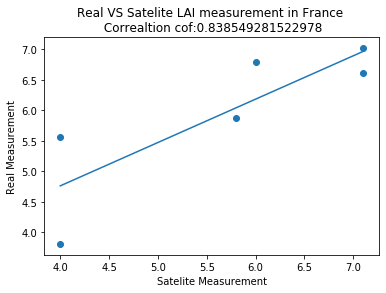

In [424]:
plt.scatter(sat_france_2000_LAI, real_france_2000_LAI)
cof = stats.pearsonr(real_france_2000_LAI, sat_france_2000_LAI )[0]
plt.title(f"Real VS Satelite LAI measurement in France \n Correaltion cof:{cof}")
plt.xlabel("Satelite Measurement")
plt.ylabel("Real Measurement")
x = sat_france_2000_LAI
y = real_france_2000_LAI
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.show()

In [413]:
stats.pearsonr(real_france_2000_LAI, sat_france_2000_LAI )[0]

0.838549281522978

In [414]:
sat_vietnam_2000_LAI = []
for i in real_vietnam_2000_coordinates:
    sat_vietnam_2000_LAI.append(match_coordinates(i))
    

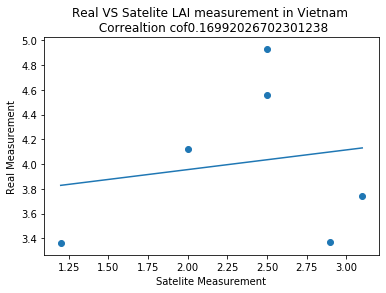

In [422]:
plt.scatter(sat_vietnam_2000_LAI, real_vietnam_2000_LAI)
cof = stats.pearsonr(real_vietnam_2000_LAI, sat_vietnam_2000_LAI )[0]

plt.title(f"Real VS Satelite LAI measurement in Vietnam \n Correaltion cof:{cof}")
plt.xlabel("Satelite Measurement")
plt.ylabel("Real Measurement")
x = sat_vietnam_2000_LAI
y = real_vietnam_2000_LAI
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.show()